### Visualize the local tranfer learning performance 

In [1]:
import matplotlib.pyplot as plt
import re

In [2]:
datasets = ["cifar10", "mnist", "mnistm", "stl", "svhn", "syn", "usps"]
file_directory = "../../logs/resnet18/"

In [3]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [4]:
def read_file(file_path):
    results = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                results[data_ratio] = accuracy
        return results

In [5]:
file_path = file_directory + "local/cifar10.log"
dic = read_file(file_path)

/tmp/ipykernel_7418/1685651725.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


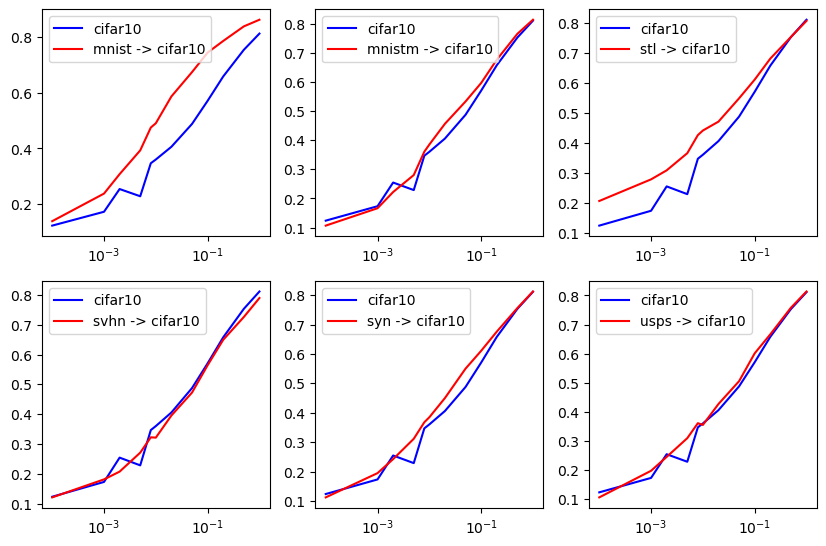

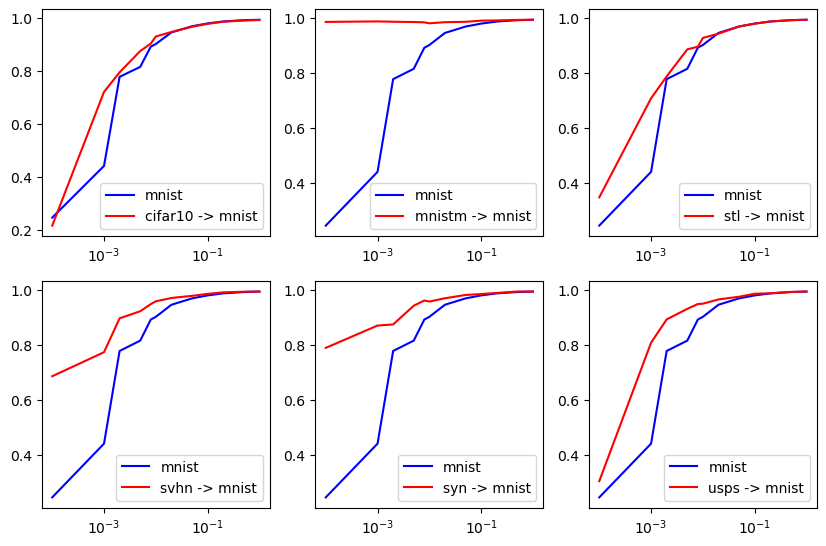

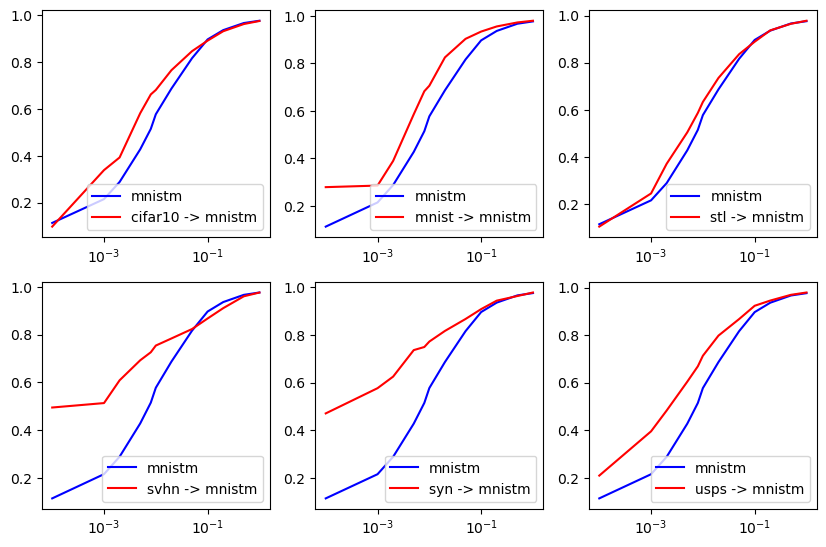

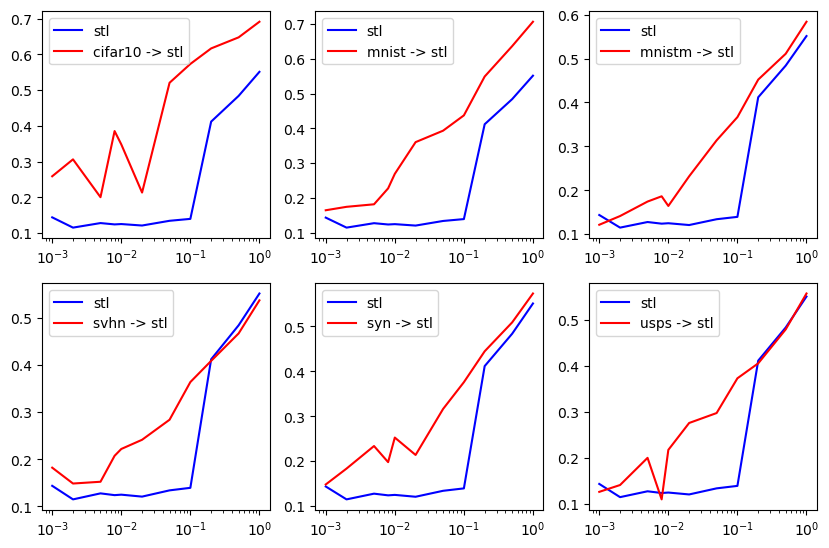

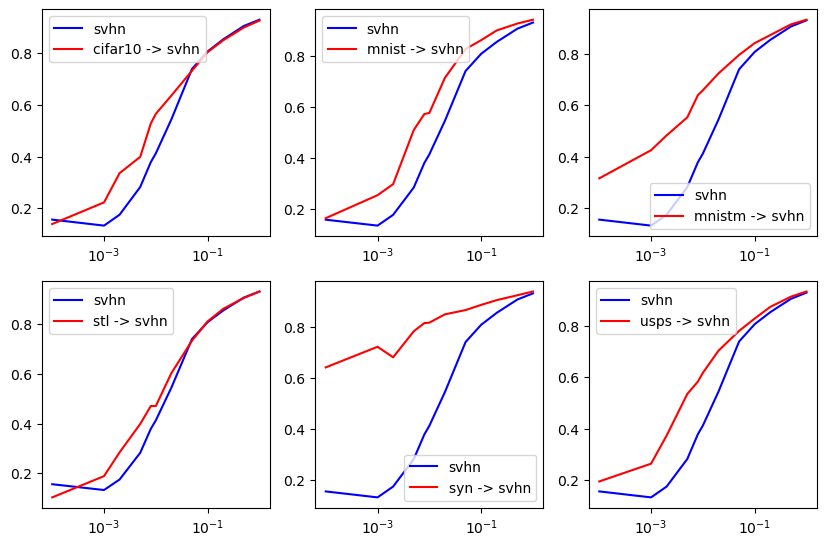

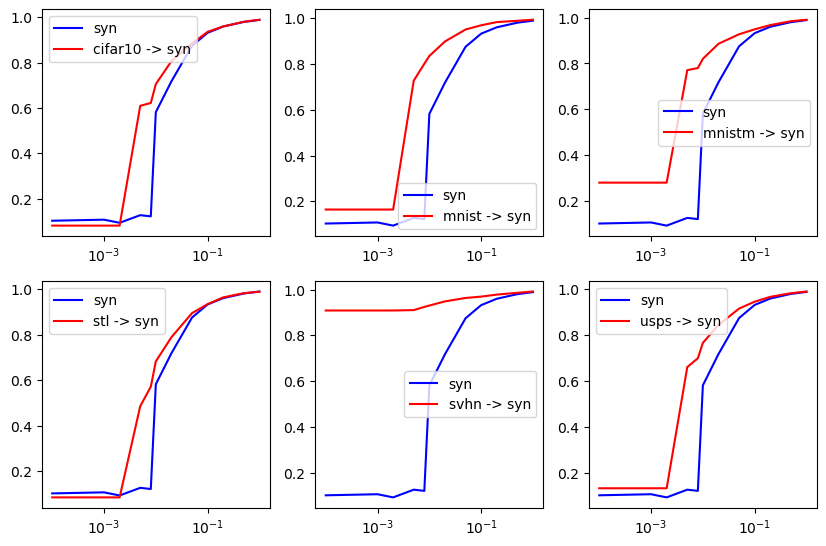

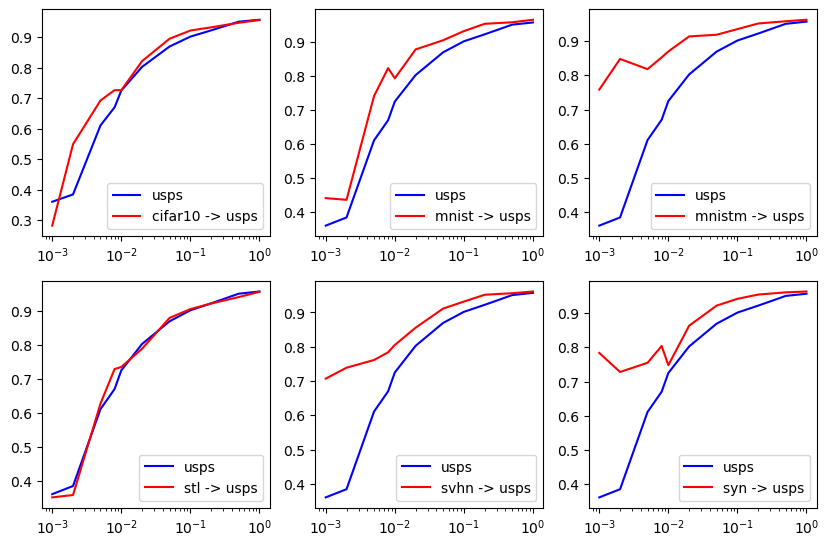

In [36]:
for target in datasets:
    plt.subplots(figsize=(10, 10))
    i = 0
    for source in datasets:    
        if source != target:
            target_path = file_directory + "local/" + target + ".log"
            target_dic = read_file(target_path)
            transfer_path = file_directory + "transfer/" + source + "-" + target + ".log"
            transfer_dic = read_file(transfer_path)
            x = list(transfer_dic.keys())
            y = list(transfer_dic.values())
            plt.subplot(3, 3, i + 1)
            i += 1
            plt.plot(list(target_dic.keys()), list(target_dic.values()), label=target, color='blue')
            plt.plot(x, y, label=source + " -> " + target, color='red')
            # log scale
            plt.xscale('log')
            plt.legend()

In [9]:
n = [0.001, 0.002, 0.005, 0.008, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
ntl = [0.1659, 0.2202, 0.4135, 0.4204, 0.464, 0.5905, 0.6253, 0.6707, 0.7214, 0.7687]
lda = [0.1057, 0.1026, 0.1198, 0.1298, 0.158, 0.3346, 0.4214, 0.5084, 0.6456, 0.7193]

ValueError: x and y must have same first dimension, but have shapes (12,) and (10,)

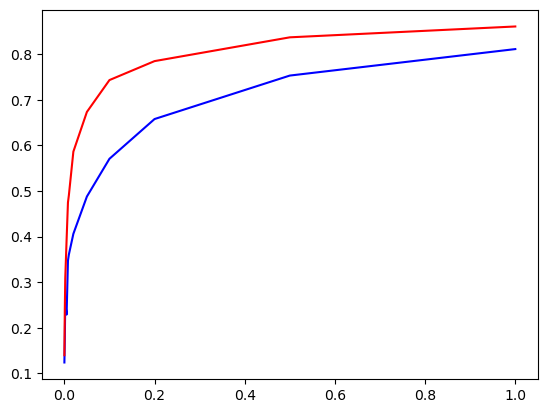

In [10]:
source = "mnist"
target = "cifar10"
target_path = file_directory + "local/" + target + ".log"
target_dic = read_file(target_path)
transfer_path = file_directory + "transfer/" + source + "-" + target + ".log"
transfer_dic = read_file(transfer_path)
x = list(transfer_dic.keys())
y = list(transfer_dic.values())
plt.figure()
plt.plot(list(target_dic.keys()), list(target_dic.values()), label=target, color='blue')
plt.plot(x, y, label=source + " -> " + target, color='red')
plt.plot(x, ntl, label="NTL", color='green')
plt.plot(x, lda, label="LDA", color='orange')
# log scale
plt.xscale('log')
plt.legend()